# Import Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

print("Import Libraries: Completed. XGBoost version:", xgb.__version__)

Import Libraries: Completed. XGBoost version: 3.1.2


# Uploading Data

In [14]:
df = pd.read_csv('data.csv')
print("Data Loaded: Completed.")

print("Data Head:\n", df.head())

Data Loaded: Completed.
Data Head:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3     

# Cleaning and Analysis

Cleaned Data Size: (10000, 11)


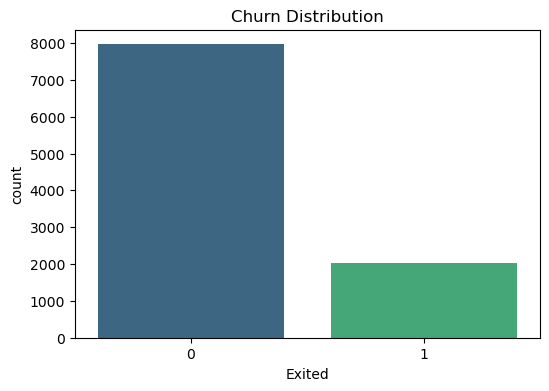

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [15]:
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
# drop only existing columns to avoid KeyError
df.drop(drop_cols, axis=1, errors='ignore', inplace=True)

print("Cleaned Data Size:", df.shape)

plt.figure(figsize=(6,4))
sb.countplot(x='Exited', data=df, palette='viridis')
plt.title('Churn Distribution')
plt.show()

print(df['Exited'].value_counts(normalize=True))

#  Preprocessing

In [17]:
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

print("Tranform after Label Encoding:")
print(df.head())

Tranform after Label Encoding:
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


# Model Training

In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model

In [19]:
print("Random Forest Training: Started.")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Results:")
print(f"Accuracy:, {accuracy_score(y_test, y_pred_rf): .4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Training: Started.
Random Forest Results:
Accuracy:,  0.8645
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# XGBoost Model

In [20]:
print("XGBoost Training: Started.")

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Results:")
print(f"Accuracy:, {accuracy_score(y_test, y_pred_xgb): .4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Training: Started.
XGBoost Results:
Accuracy:,  0.8555
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000



# Feature Importance

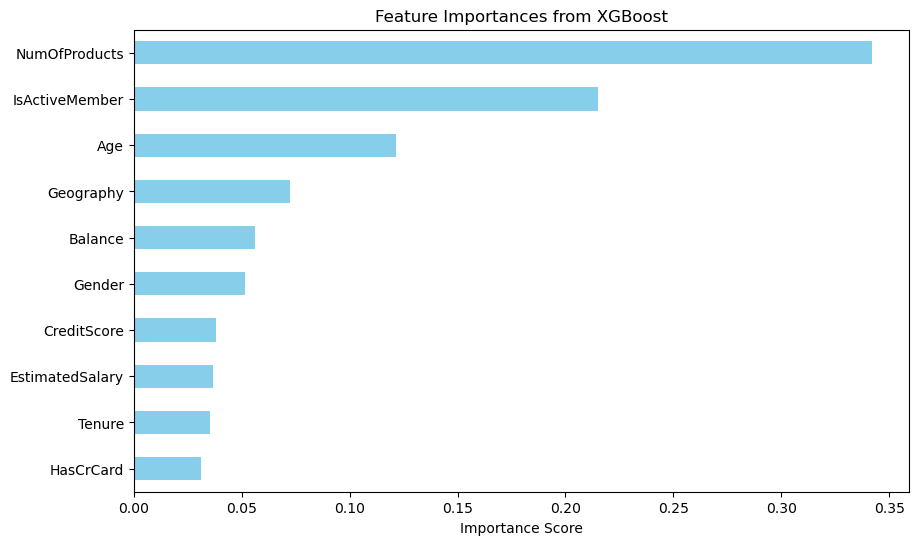

In [23]:
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance Score')
plt.show()

# Conclusion

**Data Cleaning:** We removed personal data that did not contribute to the analysis, such as `RowNumber` and `Surname`.
* **XGBoost Power:** We used the **XGBoost** algorithm, a favorite in Kaggle competitions, and observed the performance difference compared to the standard Random Forest model.
* **Critical Factors:** We discovered that the biggest factors in customers leaving the bank are:
    1.  **Age:** Customers above a certain age are riskier.
    2.  **Number of Products:** Those with fewer ties to the bank are more likely to leave.
    3.  **Balance:** Account balance influences behavior.